# Lecture 03 - Pandas and Matplotlib (Sept 10th 2019)

## The History of Pandas

Pandas was created by Wes McKinney in 2008 while he was working for AQR Capital Management. He managed to convince the company to open source the project.

Chang She, who also worked for AQR joined the project in 2012 and is the second major contributor.

Pandas signed onto NumFOCUS, a nonprofit charity, in 2015.(https://en.wikipedia.org/wiki/Pandas_(software))

A book written by Wes McKinney (Reviews indicate that the examples are not great):
+ McKinney, Wes. Python for data analysis : data wrangling with pandas, NumPy, and IPython. Sebastopol, CA: O'Reilly Media, Inc, 2018. Print.

This book covers using python for data science and includes some machine learning:
+ Vanderplas, Jacob T. Python data science handbook : essential tools for working with data. Sebastopol, CA: O'Reilly Media, Inc, 2016. Print.

There are also many excelent blog posts on pandas.

## Pandas Use Cases

Pandas primary use case is for data analysis.
It provides data structures and functionality for quickly manipulating tabular.
Some example usage:
  + cleaning data (removing/imputing missing values)
  + transforming (changing the form of the dataframe)
  + visualizing (Creating plots that summarize the data)

## Pandas has extensive documentation with examples
If you go for a few months without coding its hard to remember the little details. If you remember the function names you can read up on them when you need them.

https://pandas.pydata.org/pandas-docs/stable/

I find it hard to navigate their documentation, so I Google 'pandas \< functionality \>' and choose the link to the pandas site.

Eg:
+ Google 'pandas merge'
+ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

## Pandas Basics


+ Pandas is an external Python Package
  + This means that it is not included with the Python Standard Libraries
  + It can be installed using conda
    + `conda install pandas`
  + The latest version dropped support for Python 2
  

### Importing Pandas

In order to use the functionality provided by pandas the package will need to be imported.
The standard practice is to name this import **pd**.

```python
import pandas as pd
```

In [1]:
import pandas as pd

### What is a dataframe?

A dataframe is a collection of data where each row consists of a collection of observations.

#### Creating a dataframe

There are many ways to create dataframes:
+ Coverting a dictionary to a dataframe
    ```python
df = pd.Dataframe.from_dict( << dict >> )
    ```
+ Loading the data from a csv file
    ```python
df = pd.read_csv( << csv_path >> )
    ```
+ Load the data from a url
    ```python
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv"
df = pd.read_csv(url)
    ```

#### Loading data from a dictionary

Some of these examples are taken from the pandas documentation (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html#pandas.DataFrame.from_dict)

###### By default, each item in the dictionary will represent a column
```python
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)
```

In [4]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data)
df

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


###### This can be changed by changing the orient parameter to 'index' (the default is 'column')
```python
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')
```

In [5]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')

,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


###### The names of the columns can be set using the columns parameter
```python
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index',
                        columns=['A', 'B', 'C', 'D'])
```

In [6]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index',
                        columns=['A', 'B', 'C', 'D'])

,A,B,C,D
row_1,3,2,1,0
row_2,a,b,c,d


###### Alternatively you can specify the column names in the dictionary
```python
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
pd.DataFrame.from_dict(data, orient='index')
```

In [8]:
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
pd.DataFrame.from_dict(data)

,Tree1,Tree2,Tree3
girth,8.3,8.6,8.8
height,70.0,65.0,63.0
volume,10.3,10.3,10.2


**Note** Each row needs to have a unique identifier, in the above example this is represented by '**Tree#**'. Generally this is represented by an integer ranging from 0->n. 
+ In the above example we can reset the index to be the integers using the reset_index() function.
```python
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
pd.DataFrame.from_dict(data, orient='index').reset_index()
```

In [9]:
pd.DataFrame.from_dict(data, orient='index').reset_index()

,index,girth,height,volume
0,Tree1,8.3,70,10.3
1,Tree2,8.6,65,10.3
2,Tree3,8.8,63,10.2


###### Loading Data from a URL
```python
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv"
df = pd.read_csv(url)
df
```

In [14]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Girth,Height,Volume
0,1,8.3,70,10.3
1,2,8.6,65,10.3
2,3,8.8,63,10.2
3,4,10.5,72,16.4
4,5,10.7,81,18.8


In [15]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


### Accessing values in the dataframe
```python
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
df = pd.DataFrame.from_dict(data, orient='index')
```

In [16]:
data = {
    'Tree1': {'girth': 8.3, 'height': 70, 'volume': 10.3},
    'Tree2': {'girth': 8.6, 'height': 65, 'volume': 10.3},
    'Tree3': {'girth': 8.8, 'height': 63, 'volume': 10.2}
}
df = pd.DataFrame.from_dict(data, orient='index')
df

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


#### Columns

##### Getting Column Names

+ To get a list of column names you can covert the dataframe into a list
```python
list(df) # returns a list of column names
# or
df.columns.values # returns a numpy array of column names
```

As with most of programming there are multiple methods of doing the same thing.
It is generally preferable to use the option that is easier to understand. In this case `df.columns.values` as this explicitly states what values are being extracted


In [17]:
df.columns.values

array(['girth', 'height', 'volume'], dtype=object)

##### Pulling a column out of a dataframe

+ Access columns using the column name in square brackets to return a series containing the data.
```python
df["column_name"]
```

+ A series is a 1D array of id, value pairs

In [19]:
df["girth"]

Tree1    8.3
Tree2    8.6
Tree3    8.8
Name: girth, dtype: float64

In [20]:
df[["girth"]]

,girth
Tree1,8.3
Tree2,8.6
Tree3,8.8


##### Subsetting a Dataframe using a List of Columns

Use a list of column names to extract those columns as a dataframe

```python
df[["column_1", "column_2"]]
```

A useful way to remember this is 1D indexing \[ \] returns a series and 2D indexing \[\[ \]\] returns a dataframe.

In [21]:
df[['girth', 'height']]

,girth,height
Tree1,8.3,70
Tree2,8.6,65
Tree3,8.8,63


#### Example
Extracting the girth and height from the dataframe of tree measurements.

```python
df[["girth", "height"]]
```

Extracting the volume as a series
```python
df["volume"]
```

Extracting the volume as a dataframe
```python
df[["volume"]]
```

In [ ]:
df["volume"]

### Pandas and Numpy

+ A package for scientific computing
+ A more powerful version of lists
+ All of the methods are optimized to run fast
+ Great for linear algebra, statistical analysis

Pandas makes use of a lot of Numpy functionality under the hood.


I have added a previous jupyter notebook I presented on Numpy to the topic 1 directory, this gives a brief introduction to numpy.

#### Converting Series and Dataframe types into Arrays

The `.values` function will return a numpy array containing the data.

For series type data the array will be 1-dimensional and for dataframes the array will be 2-dimensional.

```python
df["volume"].values
```

```python
df[["girth", "height"]].values
```

In [22]:
df[["girth", "height"]].values

array([[ 8.3, 70. ],
       [ 8.6, 65. ],
       [ 8.8, 63. ]])

#### Accessing rows from the dataframe

Rows are accessed using either **loc** or **iloc**

###### iloc
+ This will access rows depending on their integer index
+ The first row will have index 0
+ Then next will have index 1, ...
+ To extract the first row you would use the following command
    + This will return a series containing the information from that row
```python
df.iloc[0]
```
+ To extract multiple rows you can pass a list of indices
    + This will return a dataframe containing the specified rows
    + The dataframe will be in the order of the indicies
      + \[0, 1, 2\] - original order
      + \[2, 1, 0\] - reversed
      + \[0, 0, 1\] - repeats
      
```python
df.iloc[[0, 1, 2]]
```

In [25]:
df.iloc[[0, 0, 1]]

,girth,height,volume
Tree1,8.3,70,10.3
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3


###### loc

Various arguments will work with loc to extract rows from a dataframe

+ A single index label
    + Returns a series for that specific **row**
    ```python
df.loc["Tree2"]
    ```
+ A list of index labels
    + Returns a dataframe containing those **rows**
    ```python
df.loc[["Tree1", "Tree3"]]
    ```
+ A boolean list
    + Returns a dataframe for **rows** that are labeled true
      + The number of booleans should match the number of rows
      + row 0 - False
      + row 1 - True
      + row 2 - False
    ```python
df.loc[[False, True, False]]
    ```

In [28]:
df.loc[[False, True, True, True]]

IndexError: Item wrong length 4 instead of 3.

#### Extracting data by value

Comparison operators can be applied to series objects (which are numpy lists)
For each value it will return either True or False depending on the comparison

**eg**
```python
pd.Series([1,1,1,5,5,5]) > 3
> [False, False, False, True, True, True]
```

This is convenient as **.loc** can use an array of booleans to extract rows.


This allows for specific rows to be extracted from the dataframe depending on their value


In [29]:
pd.Series([1,1,1,5,5,5]) > 4

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

+ Trees that are shorter than 70
    + df["height"] will return a series
    ```python
    df["height"]
    ```
    + df["height"] < 70 will return a list of booleans
        + ```python
          df["height"] < 70
          ```
        + ```python
        > [False, True, True]
        ```
    
    + We can then use this to extract those rows from the dataframe
    ```python
df.loc[df["height"] < 70]
    ```
    

|name|girth|	height|	volume|
|-    |-      |-      |-|
|Tree1|	8.3|	70|	10.3|
|Tree2|	8.6|	65|	10.3|
|Tree3|	8.8|	63|	10.2|

In [39]:
df.loc[df["height"] < 70]

,girth,height,volume
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


In [34]:
df[["height"]] < 70

,height
Tree1,False
Tree2,True
Tree3,True


##### How would you get the rows where the volume is equal to 10.3?

In [41]:
df.loc[df["volume"] == 10.3]

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3


##### Combining conditions

Numpy has various bitwise operations which work on boolean arrays (bitwise operations work on binary sequences, a boolean list is a binary sequence)
```python
import numpy as np
```
+ **&**
    + This is equivilant to the **and** logical operator or intersection set operator
    + The resulting list will only be true where both conditions are true
    ```python
l1 = np.array([True, False])
l2 = np.array([True, True])
l1 & l2
    ```
+ |
    + This is equivilant to the **or** logical operator or union set operator
    + The resulting list will be true where any of the conditions is true
    ```python
l1 = np.array([True, False])
l2 = np.array([True, True])
l1 | l2
    ```
+ ~
    + This is the **negation** operator and is equivilant to the **not** logical operator
    + The resulting True/False values will be flipped
        ```python
l1 = np.array([True, False])
~l1
    ```
    
**When combining multiple conditions they should be put in separate parenthesis**

This is to avoid ambiguity. The list of booleans for each condition is calculated then the results are compared.

```python
l = np.array([1,1,1, 10,10,10])
# l % 2 == 0 & l < 10
(l % 2 == 0) & (l < 10)
```

In [43]:
import numpy as np

In [45]:
l1 = np.array([True, False])
l2 = np.array([True, True])
print(l1, l2)

[ True False] [ True  True]


In [46]:
l1 & l2

array([ True, False])

In [51]:
l = np.array([1,1,1, 10,10,10])
(l % 2 == 0) & (l < 10)

array([False, False, False, False, False, False])

In [53]:
df

,girth,height,volume
Tree1,8.3,70,10.3
Tree2,8.6,65,10.3
Tree3,8.8,63,10.2


###### Using this how can we extract all rows with height < 70 and volume equal to 10.3?

In [55]:
height_cond = df['height'] < 70
volume_cond = df['volume'] == 10.3
df.loc[height_cond & volume_cond]

,girth,height,volume
Tree2,8.6,65,10.3


###### Using this how can we extract all rows except with height < 70 and volume equal to 10.3?


In [56]:
height_cond = df['height'] < 70
volume_cond = df['volume'] == 10.3
df.loc[~(height_cond & volume_cond)]

,girth,height,volume
Tree1,8.3,70,10.3
Tree3,8.8,63,10.2


# Pandas Limitations
+ More than 2 dimensional data
  + Split the data into multple dataframes
+ Large datasets (< 100Gb)
  + Pandas works best with datasets < 1Gb
  + There are workarounds
    + Load the file in chunks
  + Though it is probably better to use alternate tools

## Matplotlib

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

Matplotlib was originally written by John D. Hunter, has an active development community, and is distributed under a BSD-style license. Michael Droettboom was nominated as matplotlib's lead developer shortly before John Hunter's death in August 2012, and further joined by Thomas Caswell.

As of 23 June 2017, matplotlib 2.0.x supports Python versions 2.7 through 3.6. Python3 support started with Matplotlib 1.2. Matplotlib 1.4 is the last version to support Python 2.6.

Matplotlib has pledged to not support Python 2 past 2020 by signing the Python 3 Statement.

Source: https://en.wikipedia.org/wiki/Matplotlib

### What can Matplotlib Plot

Short answer: Everything

Longer answer: Some plots will require more work than other.

### Why use Matplotlib

Matplotlib is extremely customizable. They provide a framework for generating plots, after the plots have been generated every aspect of the figure can be customized.

Due to this flexibility, many other packages extend Matplotlib such as Seaborn.

### Installing Matplotlib
Matplotlib is not included in the standard python packages so it will need to be installed.

```bash
conda install matplotlib
pip install matplotlib
```

### Importing Matplotlib
Matplotlib is not imported as a whole, instead only the pyplot sub-module is imported. This module contains commands for manipulating figures. It is standard practice to name this import **plt**.

```python
import matplotlib.pyplot as plt
```

### Backends and Renderes
Matplotlib uses different backends for rendering figures. The backend can be changed for different circumstances, but generally can be left with the default. The backend determines which application matplotlib will open to view the figures.

The renderer determines the format of the rendered images eg: svg, png, ps, pdf etc...

When drawing figures within a jupyter notebook a magic function needs to be called so that the figures will appear in the notebook.

```python
%matplotlib inline
```

This is generally called at the end of the import cell at the top of the notebook.
I will also import numpy as we will make use of it throught this section. We will also need to set the seed before generating random numbers so that our random numbers will be the same.

```python
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
```

In [57]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### A simple plot

We can use numpy to generate some a 1D list of random values and visualize this list.

```python
np.random.seed(123454321)
values = np.random.normal(0, 1, size=400)
plt.plot(values)
```

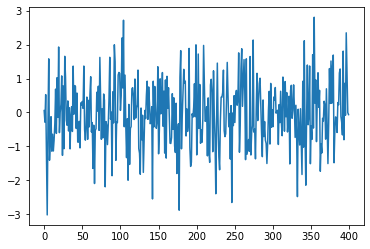

In [72]:
np.random.seed(123454321)
values = np.random.normal(0, 1, size=400)
_ = plt.plot(values)

The `plot` function will always generate a **line** plot. If a 1D list is provided, the values within the list will determine the y coordinate and the index of the value will determine the x coordinate.

Why does the output show something simlar to this before the plot?
+ \[<matplotlib.lines.Line2D at 0x115a04438>\]

The reason is that every function in python returns something, plot returns a list of lines.
When working in Jupyter the output from the last function/variable is always printed in the cell. In this case that output is the result from running plt.plot(values).

To fix this we need to save the result of that function. In python it is a standard practice to save unused values as an underscore.

```python
_ = plt.plot(values)
```

### Providing x coordinates for the list of values

As previously stated, if a list of coordinates is not provided, the index of each value will act as the x-coordinate.

If you would like to map the values to x coordinates then a second list must be provided to the plot function with the same number of elements as the list of values.

```python
plt.plot(x_list, y_list)
```

If the lists are not of equal length then a **ValueError** will be thrown.

`ValueError: x and y must have same first dimension, but have shapes (399,) and (400,)`

#### What does the following line of code do?
```python
_ = plt.plot(np.linspace(-5, 5, len(values)), values)
```

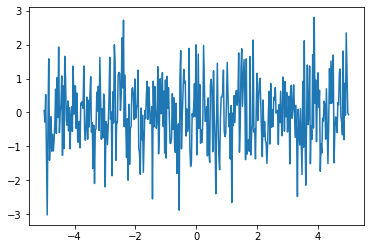

In [73]:
_ = plt.plot(np.linspace(-5, 5, len(values)), values)

In [74]:
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

### Adding additional lines to the plot

Additional lines can be plotted by calling the `plt.plot()` function again with the list of new values.

```python
np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

_ = plt.plot(line_1)
_ = plt.plot(line_2)
```

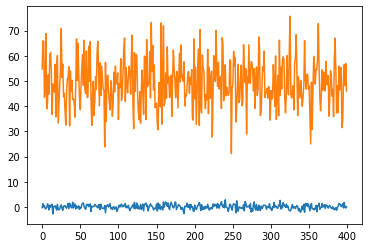

In [75]:
np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

_ = plt.plot(line_1)
_ = plt.plot(line_2)

### Generating separate plots within the same code block

What if instead of showing both lines on the same plot we would like to show two separate plots?

To fix this we can use the `plt.show()` function. This function will take the currently plot and render it. Once it has been rendered the plot is cleared so that another figure can be rendered.

```python
np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

_ = plt.plot(line_1)
plt.show()
_ = plt.plot(line_2)
plt.show()
```

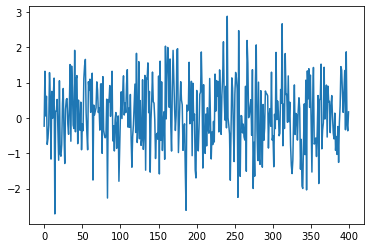

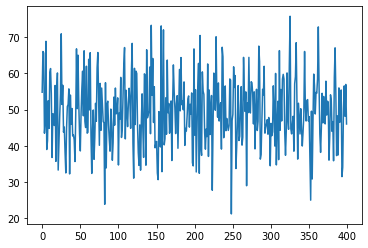

In [76]:
np.random.seed(123454321)
line_1 = np.random.normal(0, 1, size=400)
line_2 = np.random.normal(50, 10, size=400)

_ = plt.plot(line_1)
plt.show()
_ = plt.plot(line_2)
plt.show()

#### Simplifying the previous example

The two separate lines can be stored in a single 2D variable.
```python
# [ 
#    [a_0, b_0], 
#    [a_1, b_1],
#    [a_2, b_2],
#      ..., 
#    [a_n, b_n]
# ]
```

Numpy can normally generate multidimensional data using tuples to separate parameters.

In this example the **size** argument is important as we gave 2D tuples, so the size needs to be 2D.

```python
np.random.seed(123454321)
# sample 400 points from two different distributions
# dist_1: mean=0 std=1
# dist_2: mean=50 std=10
points = np.random.normal((0,50), (1,10), size=(400,2))
points
```

And then to plot those points we can pass the single variable
```python
_ = plt.plot(points)
```

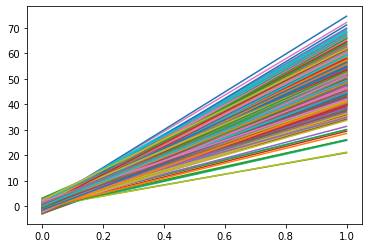

In [79]:
points = np.random.normal((0,50), (1,10), size=(400,2))
_ = plt.plot(points.transpose())

#### Scatter plots & Numpy indexing

We could think about the points array as being x, y coordinates for plotting a scatter plot.

Unfortunately if we try to plot the points we get an error due to the scatter function requiring two arguments.

```python
plt.scatter(points)
```

In [80]:
plt.scatter(points)

TypeError: scatter() missing 1 required positional argument: 'y'

To correct this we can use numpys indexing to pull out the first and second columns separately.

The general format for indexing is:
+ **array[dim_1, dim_2, dim_3, ..., dim_n]**
+ The format for each dimension follow this format
  + **start:end:step**
+ These can be combined like this:
  + **array[start:end:step, start:end:step, ..., start:end:step]**
  
So given a 2D array here are some indexing examples
```python
lst = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)
```

##### Pulling out the first row
```python
lst[0]
```

##### Pulling out the last row
```python
lst[-1]
```

##### Pulling out the first column (This returns a row vector)
```python
lst[:, 0]
```

##### Pulling out the first column (This returns a column vector)
```python
lst[:, 0:1]
```

**Just like regular lists, a single index drops a single dimension, using ranges maintains dimensions.**

In [85]:
lst = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)
lst[:, 0:1]

array([[1],
       [4],
       [7]])

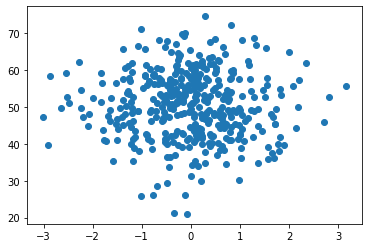

In [86]:
plt.scatter(points[:, 0], points[:, 1])

### Example 2: 2D - rgb image

#### Generate random image data (channels, width, height)
We can generate random noise using the `np.random.randint()` function.
Color images generally have 3 or 4 channels depending on if they are transparent or not.
+ They will always have red, green, and blue value for each x, y coordinate.
+ These values range from 0-255
+ 255 is the largest number that can be made from 8 bits
  + 11111111
  + 128 + 64 + 32 + 16 + 8 + 4 + 2 + 1

##### Lets create some random data
```python
width = 10
height = 10
channels = 3
img = np.random.randint(0, 255, (channels, width, height), dtype=np.uint8)
print(img)
```

In [87]:
width = 10
height = 10
channels = 3
img = np.random.randint(0, 255, (channels, width, height), dtype=np.uint8)
print(img)

[[[103  56 159  33 249  40 106 121  31  33]
  [108 135  74 200  16 147 217 202 149  48]
  [ 23 217  11 178 251  69  25 133  14 154]
  [128 154  42 244 248 121 197 216 239  41]
  [226 176  34 236 233 111 204 140 157 130]
  [103  35  97 137 131 120  71 239  85 247]
  [225  14 254   6  95  85  98  64 234 158]
  [ 43 254 165  88  80 131 241 241  11   7]
  [143 254 235  15 211 137 195  40  58  46]
  [ 80  82  68 158  16   7  40  75  18 225]]

 [[155  13 191 188 129 211 151  41  59  66]
  [120 222 237 139 215  70 129  88  39 163]
  [ 44 207  89 182 216 138  33 228 174  31]
  [ 44  88 240 108  24 172  77  15  49 178]
  [150 159 152 149   9  46 111 208  18  42]
  [242 188  44  10 240 184  44 217 245  62]
  [126  80 168 252 226 246  15 128 213  43]
  [203  51 171  94 246 136 234 124 195  35]
  [ 99 136 171 245  61 151 244 182 138 239]
  [205  18 162 251 154 154 187 181 106  48]]

 [[ 16 254 234 147 200  91 136  35 128  92]
  [ 65 246  12 168  11 183 158   3 131  87]
  [230  21 174  56 176  49  

#### Viewing images with Matplotlib

Pyplot has a specific function for viewing images called `imshow()`

If we try to plug our image into imshow we will get an error.
+ imshow expects a matrix of shape (width, height, channels)
+ Our img is of the shape (channels, width, height)

To fix this we need to rearrange the order of our dimensions

+ `img.shape` -> (1, 10, 10)
+ 'img = img.transpose(1, 2, 0).shape' -> (10, 10, 1)

#### Plotting the data:
```python
img = img.transpose(1, 2, 0)
plt.imshow(img)
```

In [89]:
img = img.transpose(1, 2, 0)

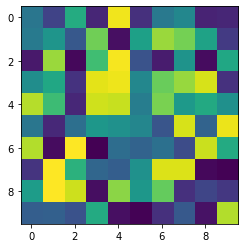

In [91]:

plt.imshow(img[:, :,0])

#### Plotting a single channel

We can use indexing to plot only a single channel from the image

```python
plt.imshow(img[:,:,0])
```


### Next time:

+ Advanced Pandas
  + Merge
  + Groupby
  + Apply
  + Agg
  + Pivot
  + Melt
+ Plotting with Seaborn
+ Customizing Plots
+ Subplots